In [14]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [16]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

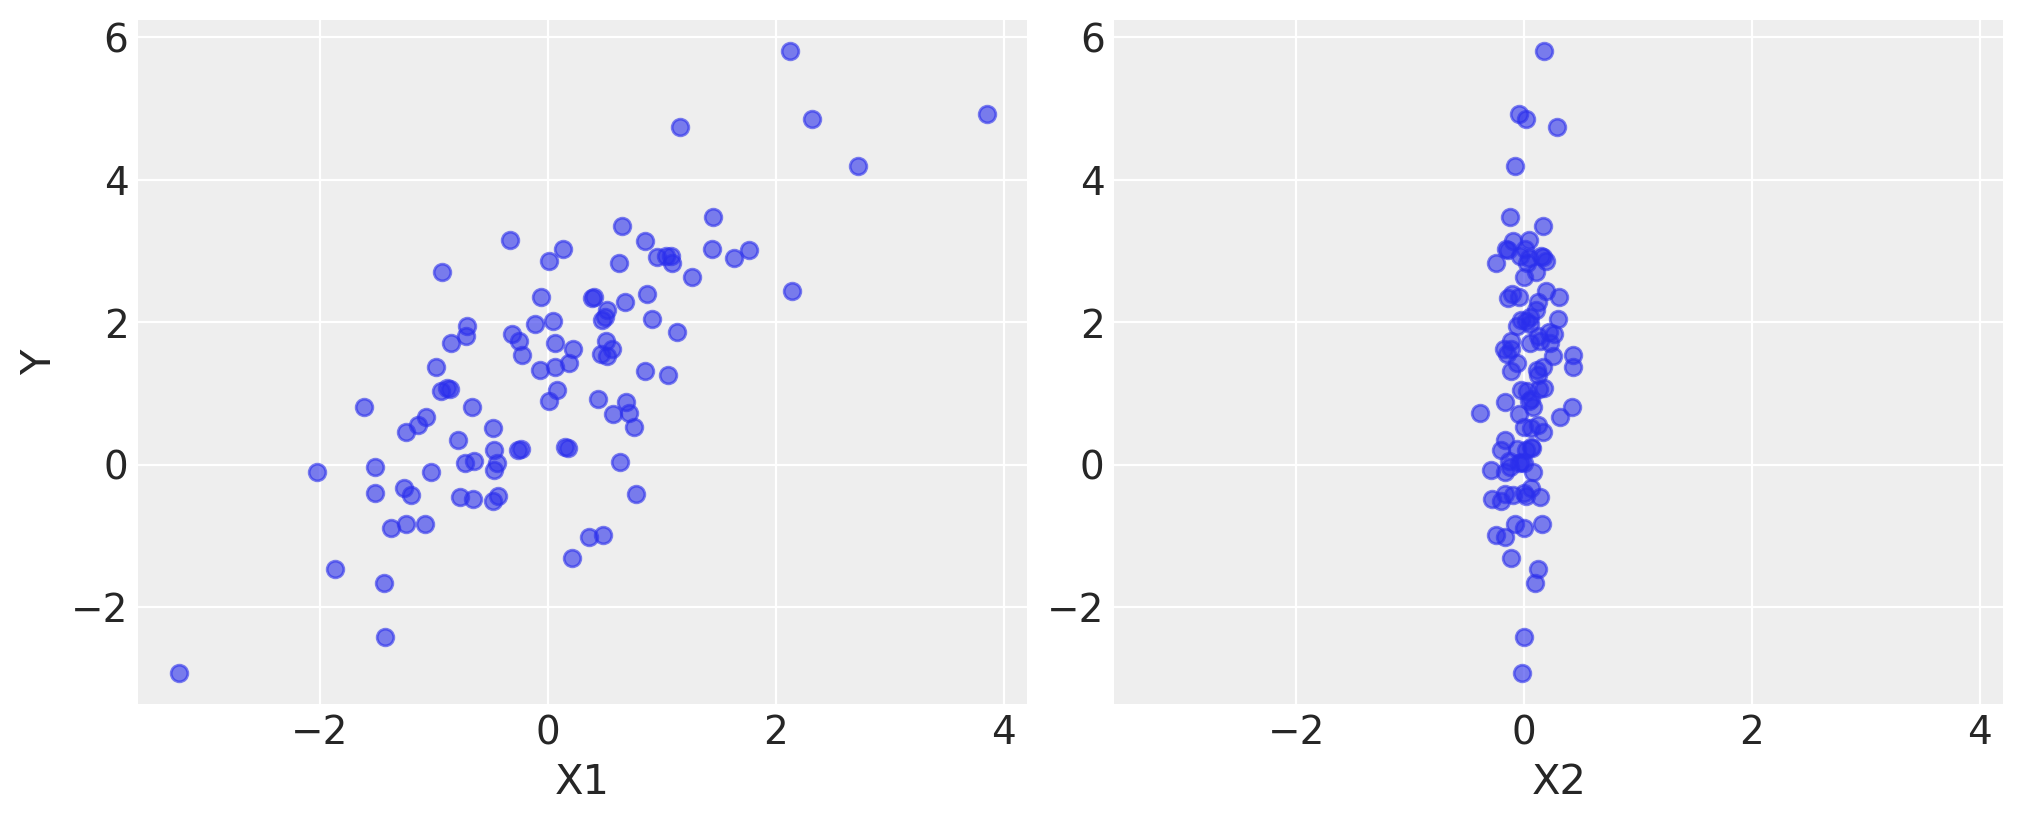

In [17]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [18]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.16.1


In [19]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [20]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


In [21]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

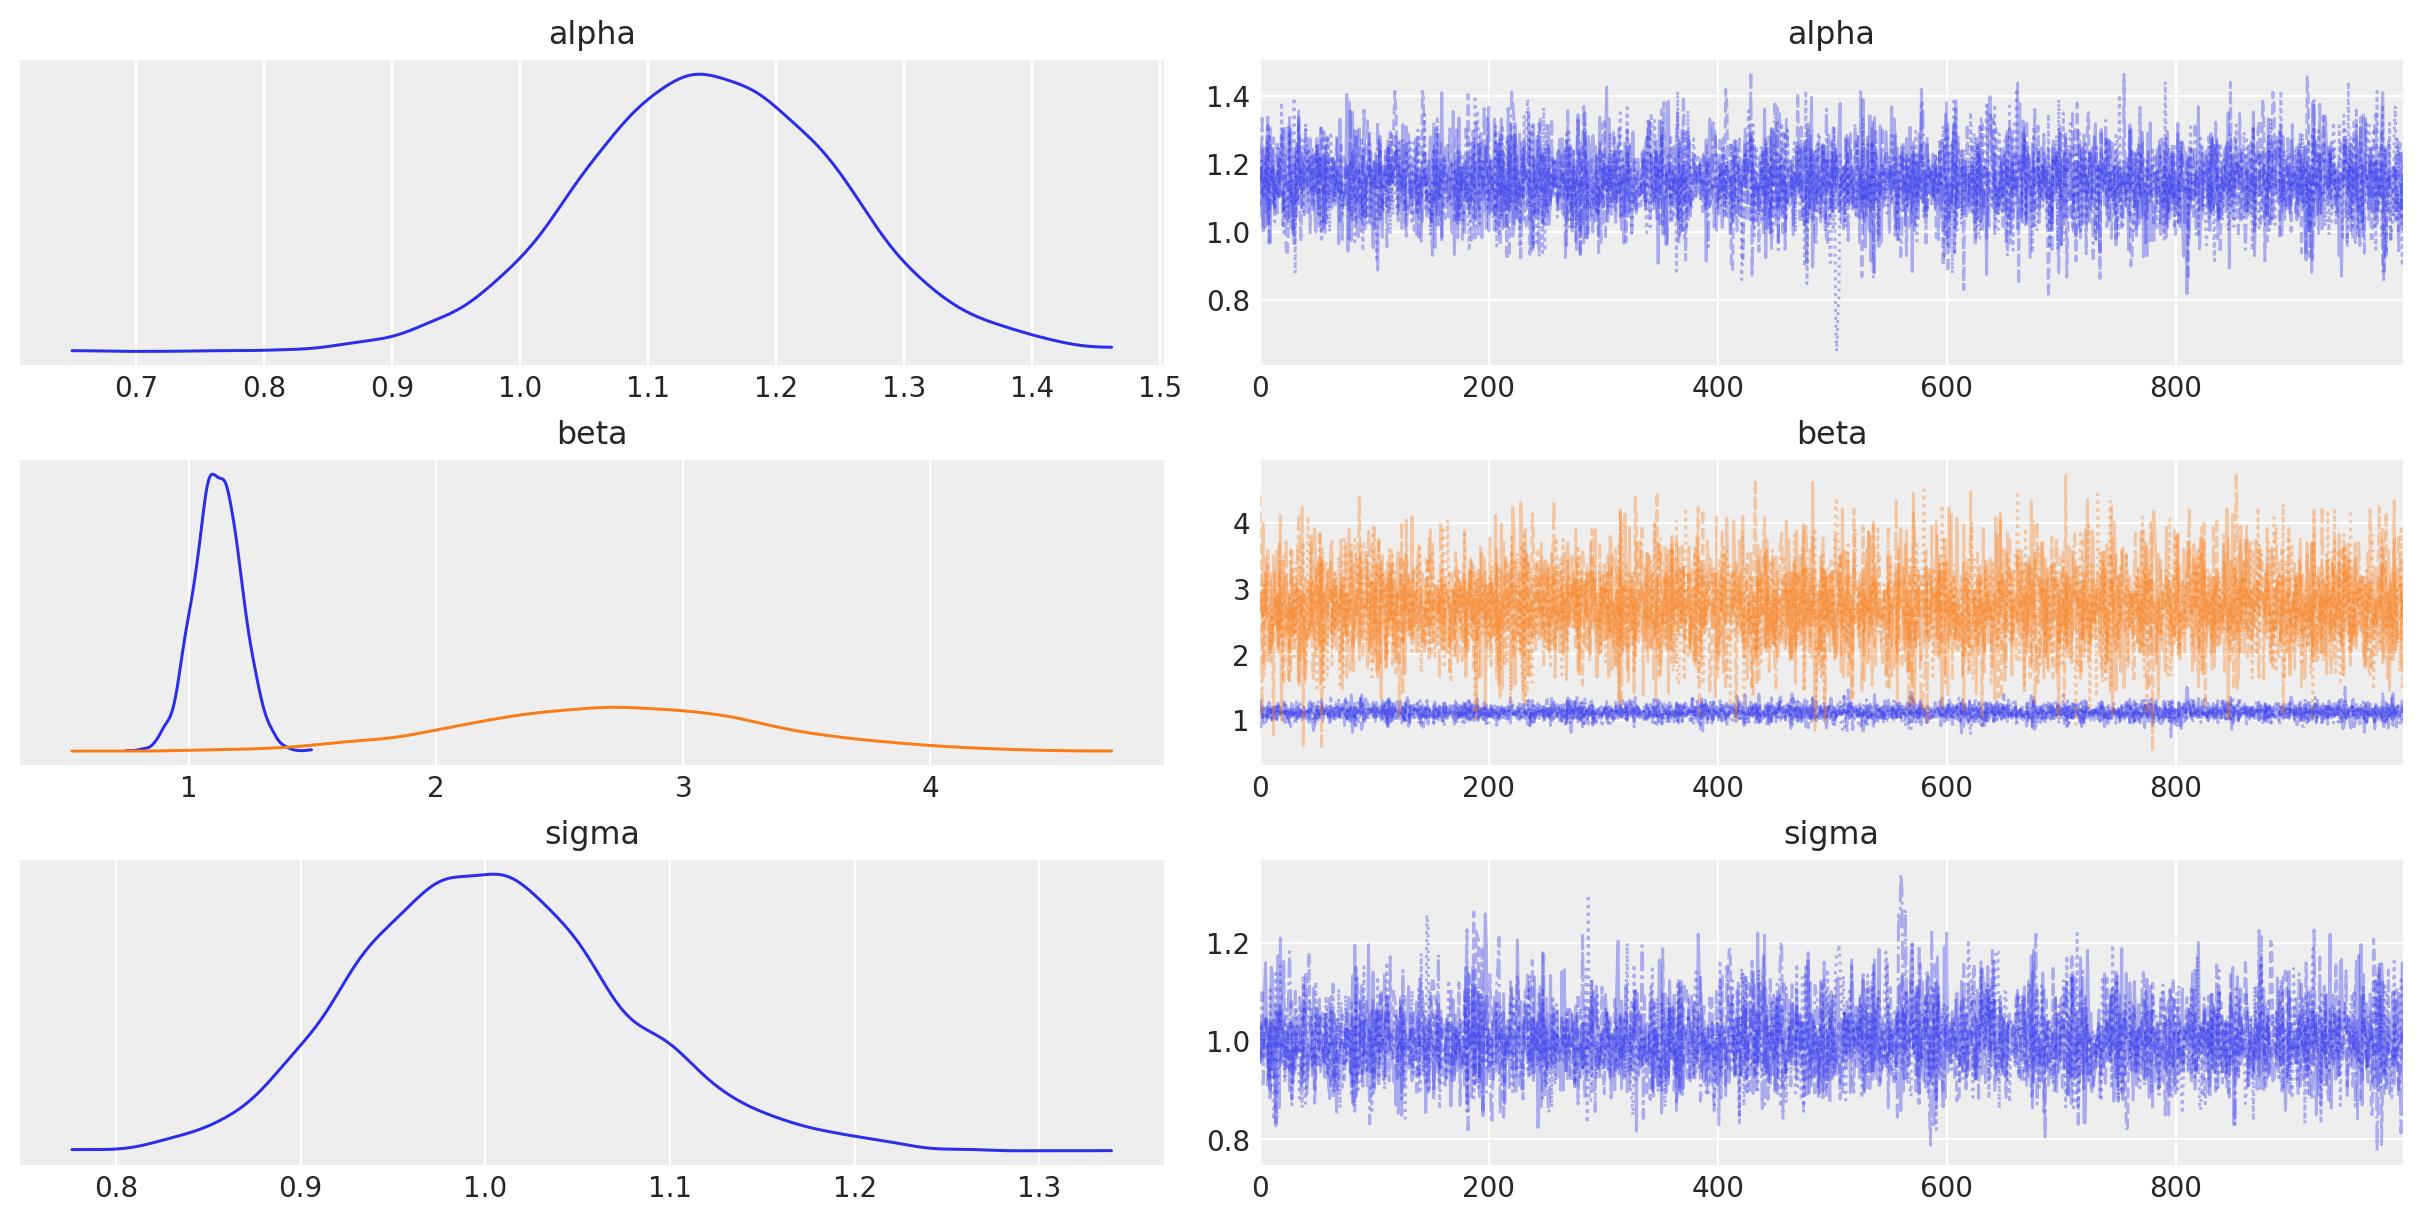

In [22]:
az.plot_trace(idata, combined=True);

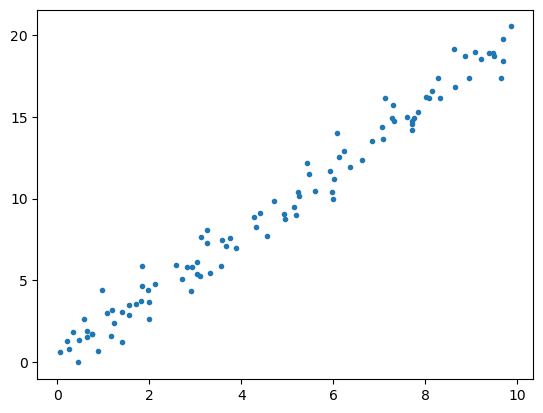

In [11]:
# Simulated data
np.random.seed(42)
x = np.random.uniform(0, 10, 100)
y = 2 * x + np.random.normal(0, 1, 100)
plt.plot(x,y,'.')

In [ ]:
# Define the model
with pm.Model() as model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)
    
    # Likelihood
    likelihood = pm.Normal('y', mu=alpha + beta * x, sigma=sigma, observed=y)

In [3]:
with model:
    # Run MCMC sampling
    trace = pm.sample(draws=1000, tune=1000, cores=1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, beta, sigma]


Output()

Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

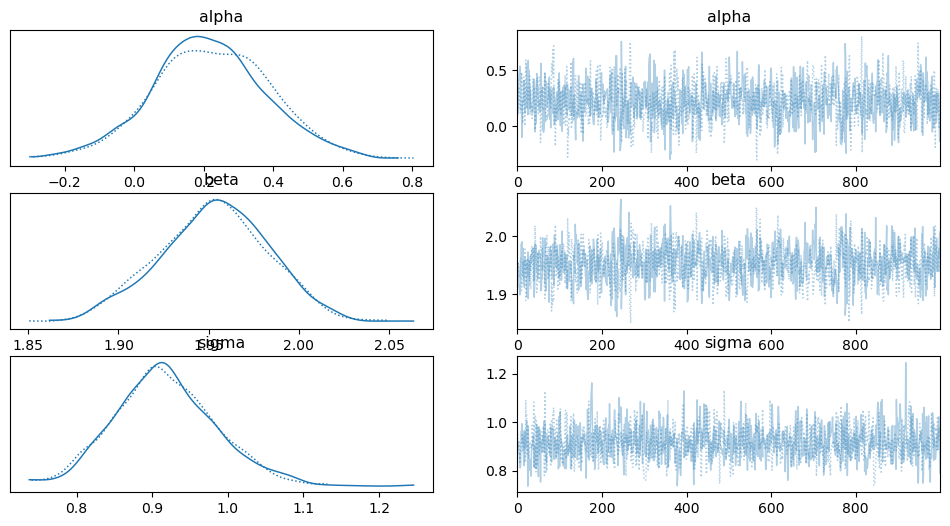

In [4]:
pm.summary(trace)
pm.plot_trace(trace)


In [12]:
with model:
    posterior_predictive = pm.sample_posterior_predictive(trace)

Sampling: [y]


Output()

In [13]:
# Posterior predictive check
posterior_predictive = pm.sample_posterior_predictive(trace, samples=500, model=model)

TypeError: sample_posterior_predictive() got an unexpected keyword argument 'samples'